# Training Model4 for counting shapes in binary images

## Different shapes with different size/radius

This notebook trains a CNN model for the Counting simple shapes (circles, squares or diamonds) experiment, more specifically all different shapes with different size/radius. The 'CNNcount' code is in a [git repository](https://github.com/NLeSC/XAI/tree/master/Software/CNNcountDemo).

### Settings

In [9]:
# Imports
from CNNcount import shape_images as si
import numpy as np
import matplotlib.pyplot as plt
from numpy import load
import os.path

import keras
from keras.utils import np_utils

In [10]:
# filename for loading the data from the NPZ files (NumPy compressed
diff_shapes_diff_radii_fname = "/home/elena/eStep/XAI/Data/CountingShapes/diff_shapes_diff_radii_60k.npz"

### Loading of pre-generated data and formatting of the data and labels.

In [11]:
# input image dimensions and number of classes
img_rows, img_cols = 64, 64
num_classes = 3

#### Data formatting

In [12]:
# load the set of NIM images with the same type and same radius and split to train, test and validaiton subsets
if os.path.isfile(diff_shapes_diff_radii_fname): # already generated- just load
    print ("The file containing images of the different shapes (circle, diamond, square) with different radii already exist!")
    # load from NPZ file for display
    images_train, images_val, _, labels_train, labels_val, _ = si.load_split_data(diff_shapes_diff_radii_fname)    
    
    if keras.backend.image_data_format() == 'channels_first':
        images_train = images_train.reshape(images_train.shape[0], 1, img_rows, img_cols)
        images_val = images_val.reshape(images_val.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        input_shape = (img_rows, img_cols, 1)
    print("Size of training data: ", np.shape(images_train), "and labels: ", np.shape(labels_train))
    print("Size of validation data: ", np.shape(images_val), "and labels: ", np.shape(labels_val))
else: # missing data
    print ("The file containing images of different shapes (circle, square, diamond) with different radii does not exist!")
    print("Use the GenerateShapeImages notebook to generate the experimental data.") 

The file containing images of the different shapes (circle, diamond, square) with different radii already exist!
Size of training data:  (42000, 64, 64, 1) and labels:  (42000,)
Size of validation data:  (12000, 64, 64, 1) and labels:  (12000,)


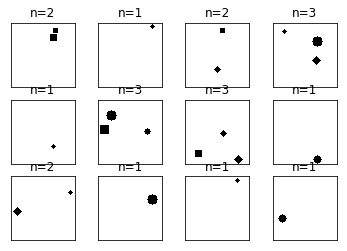

In [13]:
# plot random 12 of the train images
si.plot_12images(images_train, labels_train)

#### Labels formatting.

In [14]:
# convert class vectors to binary class matrices
labels_train = np_utils.to_categorical(labels_train-1, num_classes=None)
labels_val = np_utils.to_categorical(labels_val-1, num_classes=None)

In [15]:
print(labels_train)
print('labels_train shape:', labels_train.shape)
print('labels_val shape:', labels_val.shape)

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
labels_train shape: (42000, 3)
labels_val shape: (12000, 3)


### CNN model.

In [16]:
# imports
from CNNcount import model_count_shapes as mcs

In [17]:
# parameters of the training
batch_size = 200
epochs = 8

In [18]:
# generate the model
model = mcs.generate_cnncount_model(input_shape, num_classes)

print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_1 (Dense)      

In [ ]:
# train 
mcs.train_cnncount_model(model, images_train, labels_train,images_val, labels_val, batch_size, epochs)


Instructions for updating:
Use tf.cast instead.
Train on 42000 samples, validate on 12000 samples
Epoch 1/8
42000/42000 [==============================] - 397s 9ms/step - loss: 0.7561 - acc: 0.6406 - val_loss: 0.3884 - val_acc: 0.8456
Epoch 2/8
42000/42000 [==============================] - 414s 10ms/step - loss: 0.4413 - acc: 0.8023 - val_loss: 0.4877 - val_acc: 0.7681
Epoch 3/8
19000/42000 [============>.................] - ETA: 3:20 - loss: 0.3260 - acc: 0.8609

#### Save the model

In [ ]:
# filename for model saving
diff_shape_diff_radii_model_fname = "/home/elena/eStep/XAI/Data/CountingShapes/model_diff_shapes_diff_radii.h5"

In [ ]:
# save the trained model
model.save(diff_shape_diff_radii_model_fname)
print("Saved model to disk")
